# MOVIE RECOMMENDER SYSTEM

#### Step 1: Define Research Goal
To develop a content-based recommender system which recommends top 5 movies similar to a given movie.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### Step 2: Data Collection
The dataset has been taken from Kaggle.
Link: https://www.kaggle.com/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv

In [4]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

#### Step 3: Exploratory Data Analysis
1. Exploring the dataset(statistical measures, data types, shape, etc.)
2. Exploring and visulaizing Numerical features
3. Exploring and visulaizing Categorical features

In [5]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
movies.shape

(4803, 20)

In [8]:
credits.shape

(4803, 4)

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [10]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [11]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Merging the two datasets on 'title'

In [12]:
df = movies.merge(credits, on='title')

In [13]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [14]:
df=df[['title', 'vote_average','runtime','popularity']]

In [15]:
df.shape

(4809, 4)

In [16]:
df.dtypes

title            object
vote_average    float64
runtime         float64
popularity      float64
dtype: object

In [17]:
df.columns

Index(['title', 'vote_average', 'runtime', 'popularity'], dtype='object')

In [18]:
for features in df.columns:
    print(df[features].value_counts())

Batman                       4
The Host                     4
Out of the Blue              4
Spellbound                   1
Shanghai Noon                1
                            ..
Inside Out                   1
In the Shadow of the Moon    1
Space Jam                    1
Dazed and Confused           1
The Lego Movie               1
Name: title, Length: 4800, dtype: int64
6.0    217
6.5    217
6.7    214
6.3    207
6.1    202
      ... 
9.5      1
2.6      1
2.7      1
0.5      1
9.3      1
Name: vote_average, Length: 71, dtype: int64
90.0     163
100.0    149
98.0     140
97.0     133
95.0     123
        ... 
59.0       1
60.0       1
63.0       1
194.0      1
219.0      1
Name: runtime, Length: 156, dtype: int64
44.104469     2
42.933027     2
8.902102      2
27.655270     2
9.815394      2
             ..
3.637857      1
27.940093     1
14.905357     1
115.597753    1
0.033883      1
Name: popularity, Length: 4802, dtype: int64


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         4809 non-null   object 
 1   vote_average  4809 non-null   float64
 2   runtime       4807 non-null   float64
 3   popularity    4809 non-null   float64
dtypes: float64(3), object(1)
memory usage: 187.9+ KB


###### Correlation Matrix

<AxesSubplot:>

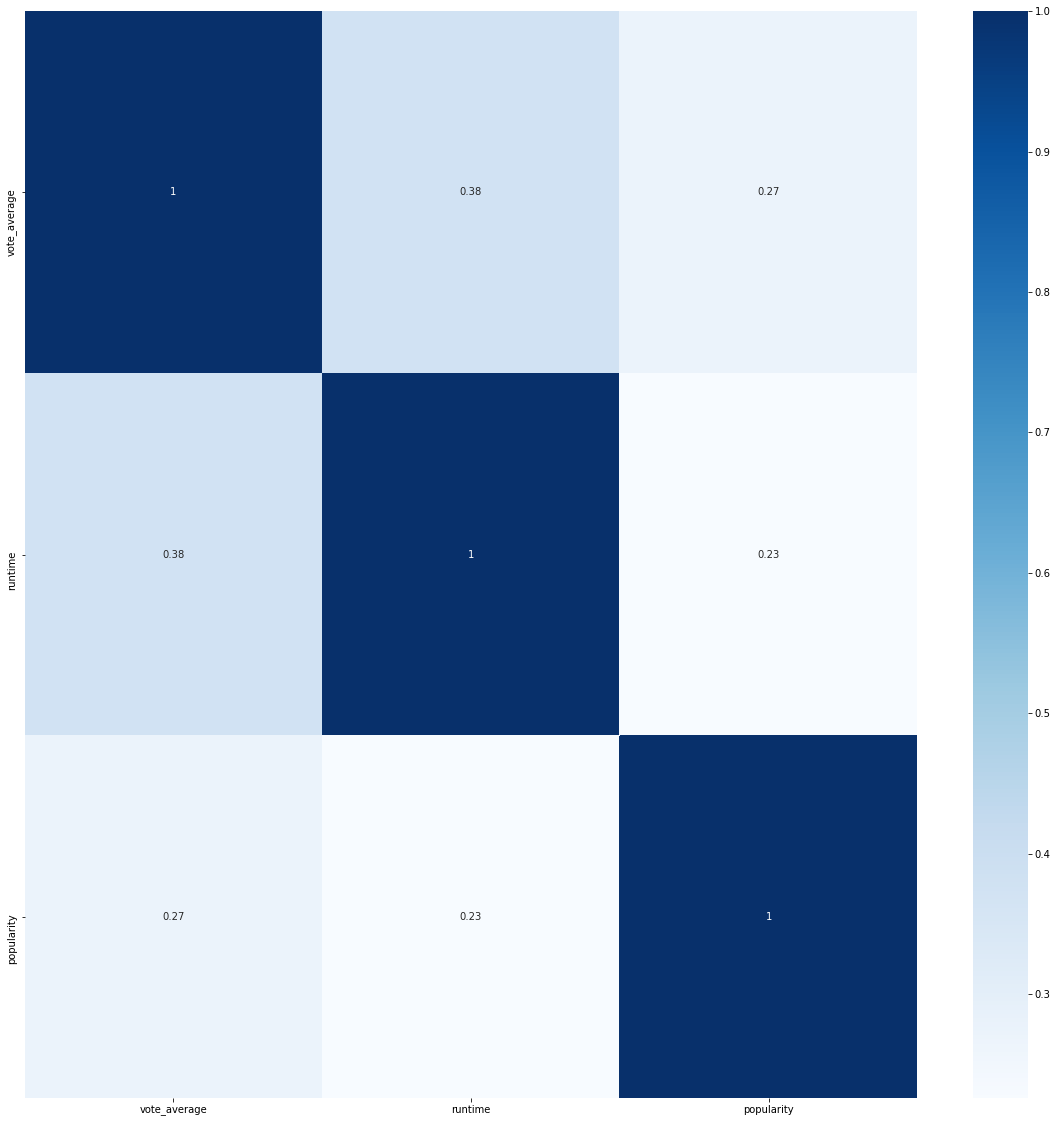

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="Blues")

In [21]:
df.head()

,title,vote_average,runtime,popularity
0,Avatar,7.2,162.0,150.437577
1,Pirates of the Caribbean: At World's End,6.9,169.0,139.082615
2,Spectre,6.3,148.0,107.376788
3,The Dark Knight Rises,7.6,165.0,112.312950
4,John Carter,6.1,132.0,43.926995


###### Checking for NaN values

In [22]:
df.isnull().sum()

title           0
vote_average    0
runtime         2
popularity      0
dtype: int64

<AxesSubplot:>

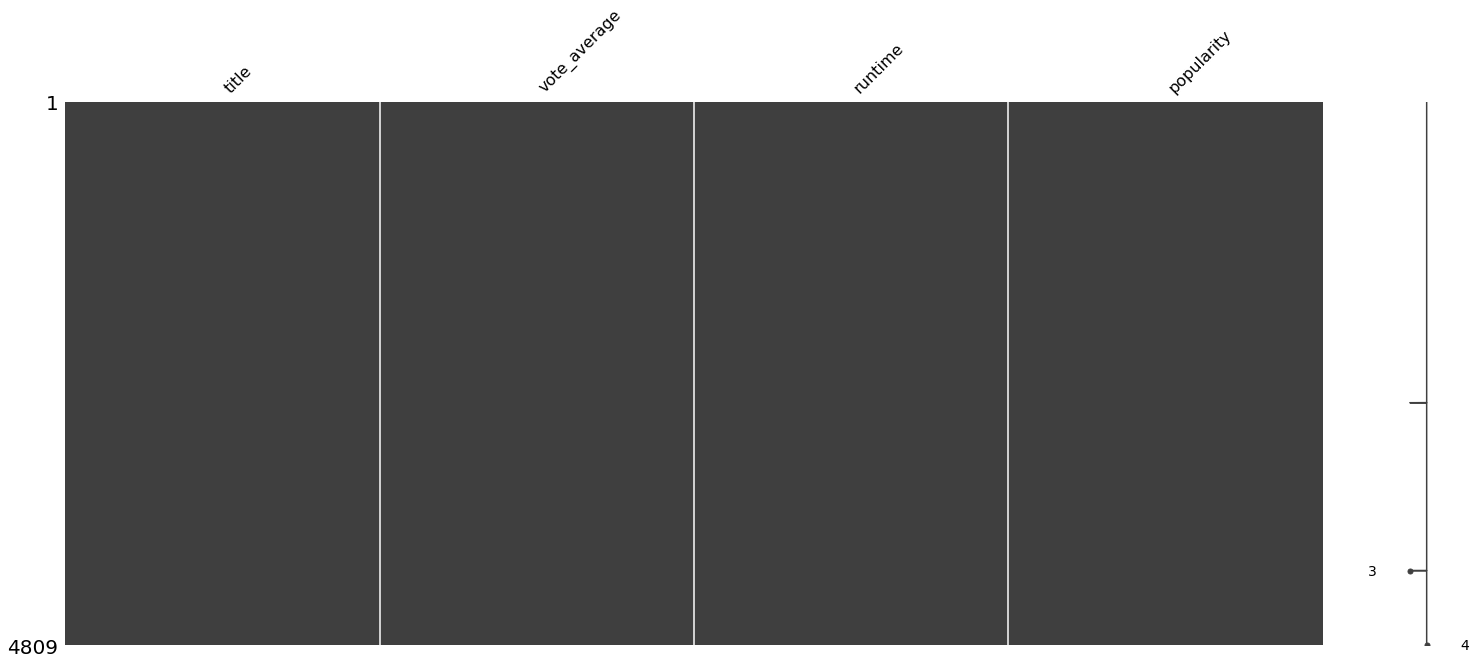

In [23]:
# Visualize missing values as a matrix
import missingno as msno
msno.matrix(df)

Inference: There are NaN values in the 'runtime' feature which needs to be handled

###### Visualization of the numerical features of the dataset using Distribution Plots

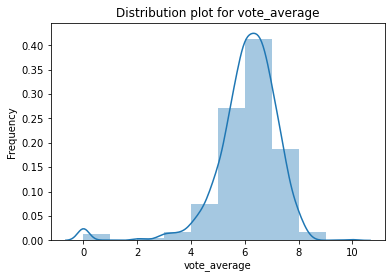

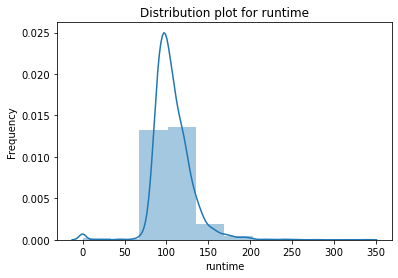

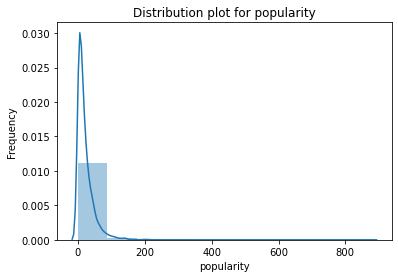

In [24]:
for cols in df[['vote_average','runtime','popularity']]:
    distributionplot = sns.distplot(a=df[cols], bins=10, hist=True, kde=True)
    plt.xlabel(cols)
    plt.ylabel('Frequency')
    plt.title('Distribution plot for ' + cols)
    plt.show()

Inference: The data is highly skewed for 'popularity' feature

###### Visualizing the outliers in the dataset

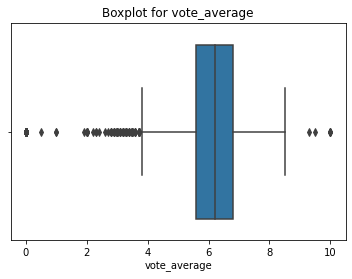

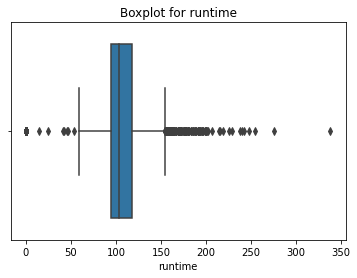

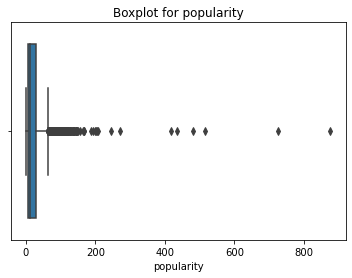

In [25]:
for col in df[['vote_average','runtime','popularity']]:
    bp = sns.boxplot(df[col])
    plt.xlabel(col)
    plt.title('Boxplot for ' + col)
    plt.show()

#### Step 4: Feature Engineering

In [26]:
df.isnull().sum()

title           0
vote_average    0
runtime         2
popularity      0
dtype: int64

Removing NaN values

In [27]:
median = df['runtime'].median()
df['runtime'] = df['runtime'].replace(np.NaN, median)

In [28]:
df.isnull().sum()

title           0
vote_average    0
runtime         0
popularity      0
dtype: int64

Text(0.5, 1.0, 'Scatter Plot after Outlier Handling')

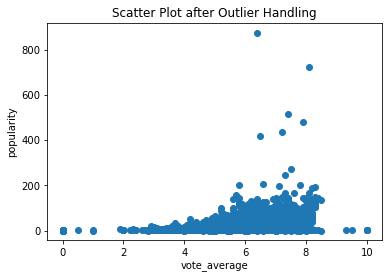

In [29]:
#Visualization using Scatter Plot after Outlier Handling
plt.scatter(df['vote_average'],df['popularity'])
plt.xlabel('vote_average')
plt.ylabel('popularity')
plt.title('Scatter Plot after Outlier Handling')

Text(0.5, 1.0, 'Scatter Plot after Outlier Handling')

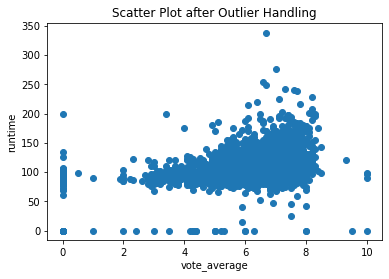

In [30]:
#Visualization using Scatter Plot after Outlier Handling
plt.scatter(df['vote_average'],df['runtime'])
plt.xlabel('vote_average')
plt.ylabel('runtime')
plt.title('Scatter Plot after Outlier Handling')

Text(0.5, 1.0, 'Scatter Plot after Outlier Handling')

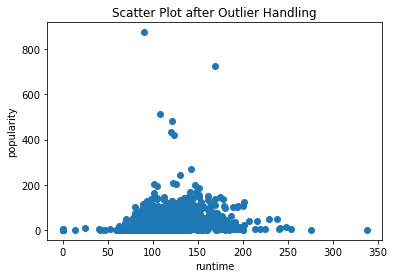

In [31]:
#Visualization using Scatter Plot after Outlier Handling
plt.scatter(df['runtime'],df['popularity'])
plt.xlabel('runtime')
plt.ylabel('popularity')
plt.title('Scatter Plot after Outlier Handling')

In [32]:
upper_limit = df['vote_average'].quantile(0.99)
lower_limit = df['vote_average'].quantile(0.01)
df['vote_average'] = np.where(df['vote_average'] >= upper_limit, upper_limit,
        np.where(df['vote_average'] <= lower_limit, lower_limit, df['vote_average']))

In [33]:
upper_limit = df['runtime'].quantile(0.99)
lower_limit = df['runtime'].quantile(0.01)
df['runtime'] = np.where(df['runtime'] >= upper_limit, upper_limit,
        np.where(df['runtime'] <= lower_limit, lower_limit, df['runtime']))

In [34]:
upper_limit = df['popularity'].quantile(0.99)
lower_limit = df['popularity'].quantile(0.01)
df['popularity'] = np.where(df['popularity'] >= upper_limit, upper_limit,
        np.where(df['popularity'] <= lower_limit, lower_limit, df['popularity']))

Text(0.5, 1.0, 'Scatter Plot after Outlier Handling')

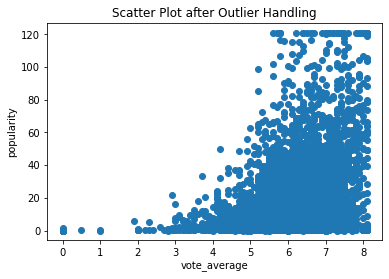

In [35]:
#Visualization using Scatter Plot after Outlier Handling
plt.scatter(df['vote_average'],df['popularity'])
plt.xlabel('vote_average')
plt.ylabel('popularity')
plt.title('Scatter Plot after Outlier Handling')

Text(0.5, 1.0, 'Scatter Plot after Outlier Handling')

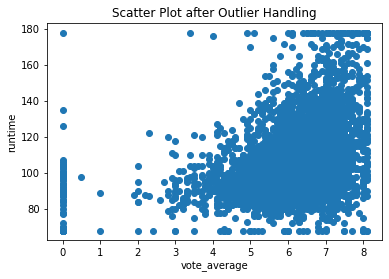

In [36]:
#Visualization using Scatter Plot after Outlier Handling
plt.scatter(df['vote_average'],df['runtime'])
plt.xlabel('vote_average')
plt.ylabel('runtime')
plt.title('Scatter Plot after Outlier Handling')

Text(0.5, 1.0, 'Scatter Plot after Outlier Handling')

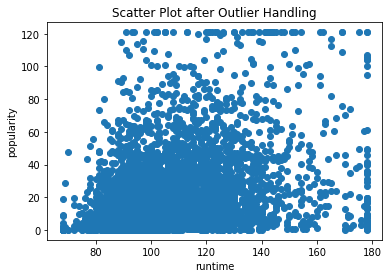

In [37]:
#Visualization using Scatter Plot after Outlier Handling
plt.scatter(df['runtime'],df['popularity'])
plt.xlabel('runtime')
plt.ylabel('popularity')
plt.title('Scatter Plot after Outlier Handling')

#### Step 5: Feature Selection
This step involves the selection of critical features while dropping the unnecessary features.

<AxesSubplot:>

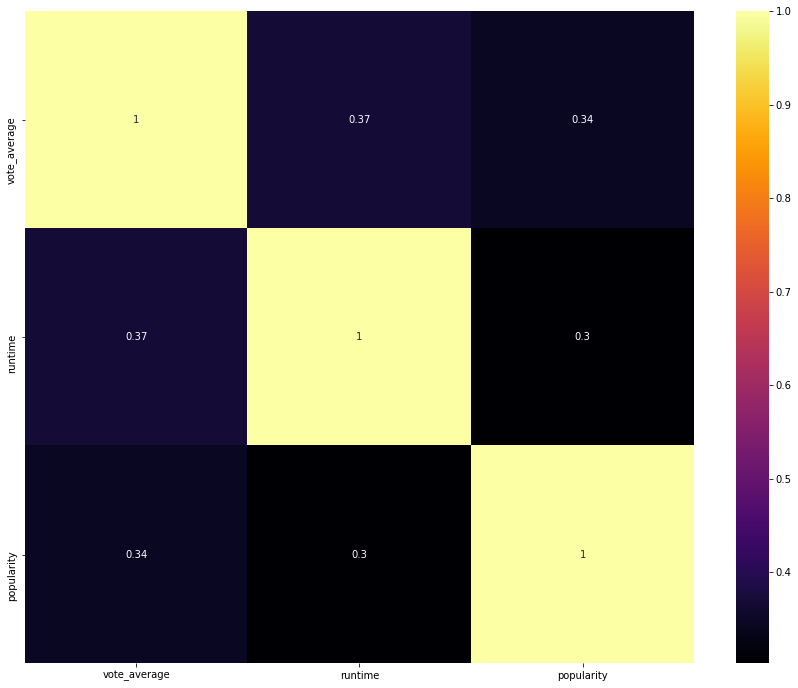

In [38]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, cmap="inferno")

In [39]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr        

In [40]:
corr_features = correlation(df, 0.85)

In [41]:
corr_features

set()

#### Step 6: Model Building - K-Means Clustering Algorithm
This project uses K-Means Clustering technique to group/cluster the data points based omn their similarities.

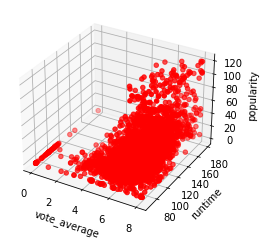

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['vote_average'], df['runtime'], df['popularity'], c='r', marker='o')

ax.set_xlabel('vote_average')
ax.set_ylabel('runtime')
ax.set_zlabel('popularity')

plt.show()

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [44]:
pred_cluster = kmeans.fit_predict(df[['vote_average', 'runtime', 'popularity']])

In [45]:
df['cluster'] = pred_cluster

In [46]:
df.head()

,title,vote_average,runtime,popularity,cluster
0,Avatar,7.2,162.0,120.946488,1
1,Pirates of the Caribbean: At World's End,6.9,169.0,120.946488,1
2,Spectre,6.3,148.0,107.376788,1
3,The Dark Knight Rises,7.6,165.0,112.312950,1
4,John Carter,6.1,132.0,43.926995,2


In [47]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
print(df1.shape)
print(df2.shape)
print(df3.shape)

(3012, 5)
(582, 5)
(1215, 5)


Visualizing the data points in 3 clusters

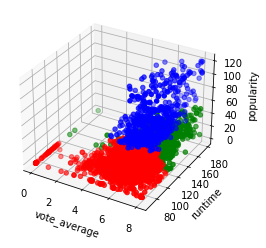

In [48]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df1['vote_average'], df1['runtime'], df1['popularity'], c='r', marker='o')
ax.scatter(df2['vote_average'], df2['runtime'], df2['popularity'], c='b', marker='o')
ax.scatter(df3['vote_average'], df3['runtime'], df3['popularity'], c='g', marker='o')

ax.set_xlabel('vote_average')
ax.set_ylabel('runtime')
ax.set_zlabel('popularity')

plt.show()

Text(0, 0.5, 'SSE')

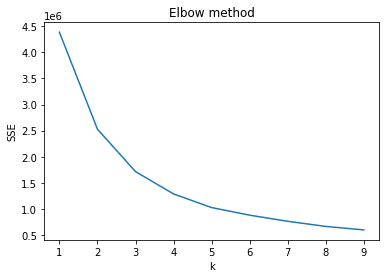

In [49]:
sse=[]
krange = range(1,10)
for k in krange:
    km=KMeans(n_clusters=k)
    km.fit(df[['vote_average','runtime','popularity']])
    sse.append(km.inertia_)

plt.plot(krange,sse)
plt.title('Elbow method')
plt.xlabel('k')
plt.ylabel('SSE')

In [50]:
km = KMeans(n_clusters=5)
Y_pred = km.fit_predict(df[['vote_average','runtime','popularity']])
Y_pred

array([4, 4, 4, ..., 3, 1, 1])

In [51]:
df['cluster2'] = Y_pred
df.head()

,title,vote_average,runtime,popularity,cluster,cluster2
0,Avatar,7.2,162.0,120.946488,1,4
1,Pirates of the Caribbean: At World's End,6.9,169.0,120.946488,1,4
2,Spectre,6.3,148.0,107.376788,1,4
3,The Dark Knight Rises,7.6,165.0,112.312950,1,4
4,John Carter,6.1,132.0,43.926995,2,0


In [52]:
df1 = df[df.cluster2==0]
df2 = df[df.cluster2==1]
df3 = df[df.cluster2==2]
df4 = df[df.cluster2==3]
df5 = df[df.cluster2==4]

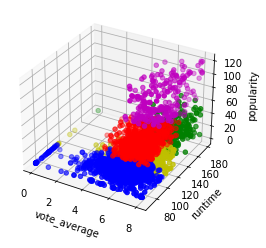

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df1['vote_average'], df1['runtime'], df1['popularity'], c='r', marker='o')
ax.scatter(df2['vote_average'], df2['runtime'], df2['popularity'], c='b', marker='o')
ax.scatter(df3['vote_average'], df3['runtime'], df3['popularity'], c='g', marker='o')
ax.scatter(df4['vote_average'], df4['runtime'], df4['popularity'], c='y', marker='o')
ax.scatter(df5['vote_average'], df5['runtime'], df5['popularity'], c='m', marker='o')

ax.set_xlabel('vote_average')
ax.set_ylabel('runtime')
ax.set_zlabel('popularity')

plt.show()

In [73]:
def extract_cluster(movie):
    cluster = df[df['title'] == movie].cluster2
    return cluster.values

In [74]:
clusternumber=extract_cluster('Avatar')

In [84]:
type(df['cluster2'][0])

numpy.int32

In [82]:
clusternumber[0]

4

In [87]:
df[df['cluster2']==clusternumber[0]]

,title,vote_average,runtime,popularity,cluster,cluster2
0,Avatar,7.2,162.0,120.946488,1,4
1,Pirates of the Caribbean: At World's End,6.9,169.0,120.946488,1,4
2,Spectre,6.3,148.0,107.376788,1,4
3,The Dark Knight Rises,7.6,165.0,112.312950,1,4
5,Spider-Man 3,5.9,139.0,115.699814,1,4
...,...,...,...,...,...,...
3726,One Flew Over the Cuckoo's Nest,8.1,133.0,120.946488,1,4
3872,Whiplash,8.1,105.0,120.946488,1,4
4081,It Follows,6.6,100.0,100.876794,1,4
4308,"The Good, the Bad and the Ugly",8.1,161.0,88.377076,1,4


In [88]:
def recommend(movie):
    df_new=df[df['cluster2']==clusternumber[0]]
    print(df_new['title'].head())

In [89]:
recommend('Avatar')

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
5                                Spider-Man 3
Name: title, dtype: object
